<a href="https://colab.research.google.com/github/todnewman/coe_training/blob/master/Basic_Unsupervised_Learning_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Unsupervised Learning Example

Here's an example of how we can still learn from data, even when there is no supervisory signal (target) in the data.  This dataset is fairly typical in that it is pretty unbalanced and has no target captured.  

We can determine from the [UC Irvine site](https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.names) that there are 13 different classes, but this info is not captured in the data.  Once we run our code, we should be able to determine how many real classes there are.


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib
import sklearn as sk
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Import a Data File and Read it Into a Pandas DataFrame

Here  we pull data from the UC Irvine open data repository. This data is useful because often it can be used to test algorithms and ML workflows.  Plus, it works well in CoLaboratory because we can download it through the firewall.

First we read the file in as a .CSV and then we print the dataframe.  You can print the dataframe by merely typing "df" only if you do it on the last line.  Otherwise, you need to print(df).  The formatting of the latter will be less pleasant than the former, BTW.

### Data description:

This dataset comes from the daily measures of sensors in a urban waste water treatment plant. The objective is to classify the operational state of the plant in order to predict faults through the state variables of the plant at each of the stages of the treatment process.  This domain has been stated as an ill-structured domain. 

###Attribute Information:

####Matrix column entries (attributes):

*  Q-E        (input flow to plant)  
*  ZN-E       (input Zinc to plant)
*  PH-E       (input pH to plant) 
*   DBO-E      (input Biological demand of oxygen to plant) 
*   DQO-E      (input chemical demand of oxygen to plant)
*   SS-E       (input suspended solids to plant)  
*   SSV-E      (input volatile supended solids to plant)
*   SED-E      (input sediments to plant) 
*   COND-E     (input conductivity to plant) 
*   PH-P       (input pH to primary settler)
*   DBO-P      (input Biological demand of oxygen to primary settler)
*   SS-P       (input suspended solids to primary settler)
*   SSV-P      (input volatile supended solids to primary settler)
*   SED-P      (input sediments to primary settler) 
*   COND-P     (input conductivity to primary settler)
*   PH-D       (input pH to secondary settler) 
*   DBO-D      (input Biological demand of oxygen to secondary settler)
*   DQO-D      (input chemical demand of oxygen to secondary settler)
*   SS-D       (input suspended solids to secondary settler)
*   SSV-D      (input volatile supended solids to secondary settler)
*   SED-D      (input sediments to secondary settler)  
*   COND-D     (input conductivity to secondary settler) 
*   PH-S       (output pH)   
*   DBO-S      (output Biological demand of oxygen)
*   DQO-S      (output chemical demand of oxygen)
*   SS-S       (output suspended solids)
*   SSV-S      (output volatile supended solids) 
*   SED-S      (output sediments) 
*   COND-S     (output conductivity)
*   RD-DBO-P   (performance input Biological demand of oxygen in primary settler)
*   RD-SS-P    (performance input suspended solids to primary settler)
*   RD-SED-P   (performance input sediments to primary settler)
*   RD-DBO-S   (performance input Biological demand of oxygen to secondary settler)
*   RD-DQO-S   (performance input chemical demand of oxygen to secondary settler)
*   RD-DBO-G   (global performance input Biological demand of oxygen)
*   RD-DQO-G   (global performance input chemical demand of oxygen)
*   RD-SS-G    (global performance input suspended solids) 
*   RD-SED-G   (global performance input sediments)
  
  

In [2]:
filename_train = 'https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data'

df_train = pd.read_csv(filename_train, parse_dates=True, header = None, encoding='ISO-8859-1')
#df_train = df_train.replace('?','')
#df_train[df_train[4].str.contains("?") == False]
df_train = df_train[~df_train.isin(['?'])]
df_train = df_train.dropna()
df_train[:5]
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 3 to 525
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       380 non-null    object 
 1   1       380 non-null    object 
 2   2       380 non-null    object 
 3   3       380 non-null    float64
 4   4       380 non-null    object 
 5   5       380 non-null    object 
 6   6       380 non-null    object 
 7   7       380 non-null    object 
 8   8       380 non-null    object 
 9   9       380 non-null    int64  
 10  10      380 non-null    float64
 11  11      380 non-null    object 
 12  12      380 non-null    int64  
 13  13      380 non-null    object 
 14  14      380 non-null    object 
 15  15      380 non-null    int64  
 16  16      380 non-null    float64
 17  17      380 non-null    object 
 18  18      380 non-null    object 
 19  19      380 non-null    object 
 20  20      380 non-null    object 
 21  21      380 non-null    object 
 22  22

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,236,268,73.1,8.5,2280,7.8,158,376,96,77.1,0.4,2060,7.6,20,104,20,96.7,0.00,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
8,D-11/3/90,29156,2.50,7.7,206,451,194,69.1,4.5,1249,7.7,206,220,61.8,4.0,1219,7.7,111,282,124,77.4,0.3,1233,7.5,16,118,19,84.2,0.03,1338,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
9,D-12/3/90,39246,2.00,7.8,172,506,200,69.0,5.0,1865,7.8,208,248,66.1,6.5,1929,7.8,164,463,100,78.0,0.6,1825,7.6,19,157,27,87.0,0.02,1616,21.2,59.7,90.8,88.4,66.1,89.0,69.0,86.5,99.6
10,D-13/3/90,42393,0.70,7.9,189,478,230,67.0,5.5,1410,8.1,173,192,62.5,5.0,1406,7.7,172,412,104,71.2,0.4,1562,7.6,152,306,131,79.6,3.50,1575,0.6,45.8,92.0,11.6,25.7,19.6,36.0,43.0,36.4
14,D-18/3/90,40923,3.50,7.6,146,329,188,57.4,2.5,1300,7.6,162,132,63.6,2.0,1324,7.6,109,243,88,81.8,0.2,1467,7.5,19,94,41,82.9,0.02,1545,32.7,33.3,90.0,82.6,61.3,87.0,71.4,78.2,99.2


## Prepare the DataFrame for Unsupervised Learning

In [3]:
'''Prep the dataset we wish to apply the model to.  There won't be a Target vector.'''
def prep_dataframe(df):
    TeamName = []
    # pop off the Name feature (we can't process the text) into an array for later use.
    Name = df.pop(0)
       
    df = df.fillna(0)
    X = np.array(df)
    return X, Name

## Simple Clustering Class - KMeans

The below is a simple and reusable approach to test various clustering techniques.  Since the wastewater treatment data is highly dimensional, I'm using Principal Component Analysis to reduce dimensionality prior to KMeans clustering.  This helps 2D visualization, but also allows us to discover hidden features.

Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables! As an added benefit, each of the “new” variables after PCA are all independent of one another.

For this example, note how good the clustering looks when you look at 2 Principal Components.  It gets a bit hairier when you use 3 PC's and plot in 3D.

For K-Means clustering, the algorithm is given the number of clusters to form.  I have picked 13 because the UCI Wastewater Dataset description tells me that there are 13 classes:
### Classes
1. Normal Situation
2. Secondary settler problem -1
3. Secondary settler problem -2
4. Secondary settler problem -3
5. Normal Situation with Performance over the Mean
6. Solids overload -1
7. Secondary Settler Problem -4
8. Storm -1
9. Normal situation with low influent
10. Storm -2
11. Normal situation
12. Storm -3
13. Solids overload -2

We can determine if 13 is the best fit or not by looking at our silhouette score.



Prep the dataset we wish to apply the model to.  There won't be a Target vector.
['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


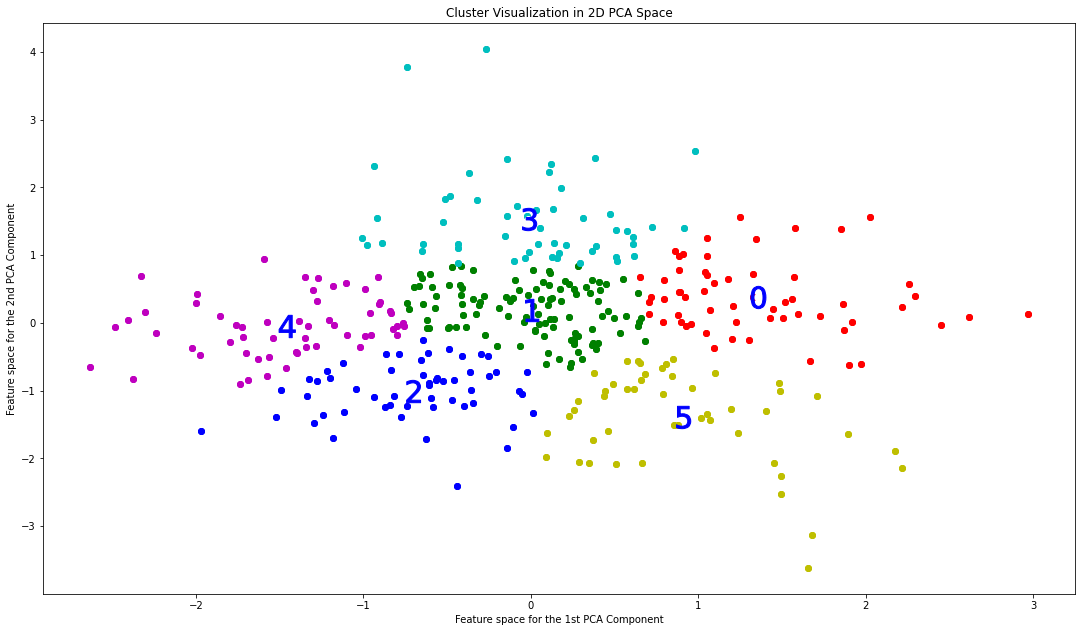

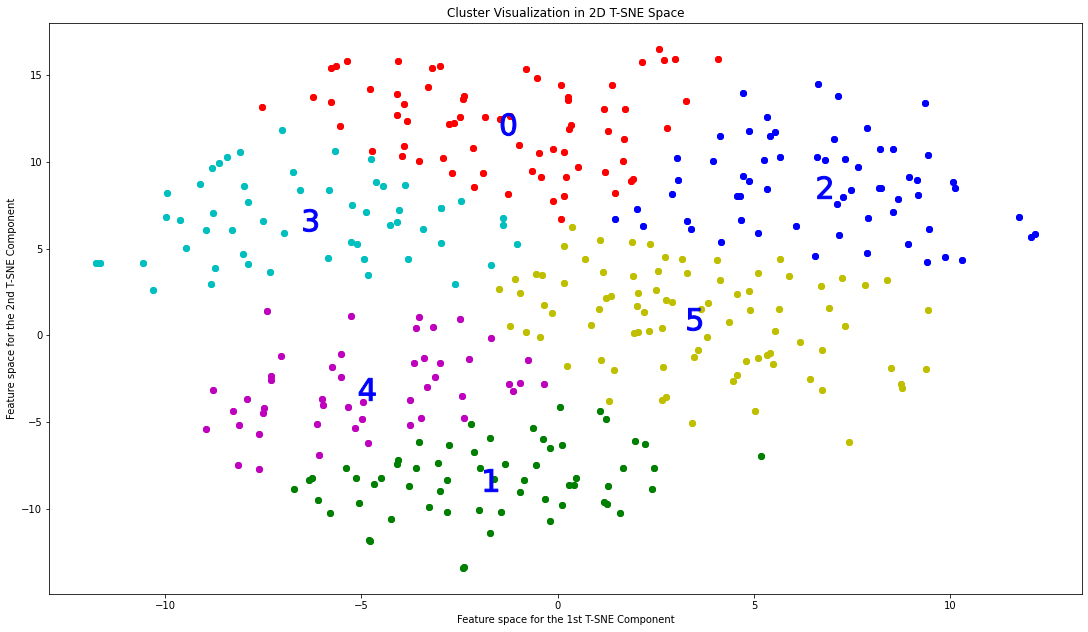

In [4]:
from itertools import cycle
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from numpy.random import RandomState
import pylab as pl
import matplotlib.pyplot as plt

class clustering:
    """ Class to perform clustering operations using kmeans and visualization
    using PCA and TSNE 
    
    Member Functions:
    
        Init:       Defines class variables then does some non-traditional "Init" things like executing the steps needed to
                    prepare the data for clustering
        get_labels: Appends cluster labels to the plot
        plot_pca:   Performs Principal Component Analysis and K-Means clustering, then executes the 2D Plot function
        plot_tsne:  Performs PCA and T-SNE visualization prior to executing 2D Plot function
        plot_2D_2:  Performs 2D plot of the clusters.  Also creates DataFrame mapping datapoints to PCA positions and Cluster ID.
                    Returns the DataFrame.
        
        """
    def __init__(self, **kwargs):
        """ Class method to set up variables fo Clustering class.  Also data
        ingest and cleaning happens in the __init__ method"""
        self.n_clusters = kwargs.get('n_clusters',6)
        self.data = kwargs.get('data')
        self.print_data_labels = kwargs.get('labels', True)       
        self.data = self.data.dropna()
        X, Names = prep_dataframe(self.data)
        X = preprocessing.MinMaxScaler().fit_transform(X)
        self.X = X
        self.Names = Names
        self.get_labels = self.get_labels()
        
            
    def get_labels(self):
        """ Class method to create an array of cluster ID's based off the desired
        number of clusters"""
        self.label_array = []
        for i in range(self.n_clusters):
            self.label_array.append(f'cluster{i}')        

    def plot_pca(self):
        """ Class method to perform Principal Component Analysis on the data
        as a form of dimensionality reduction and pre-visualization prep.  Calls
        the common 2D plot function"""
        print(self.label_array)
        pca = PCA(n_components=2, whiten=True).fit(self.X)
        X_pca = pca.transform(self.X)
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=RandomState(42)).fit(X_pca)
        centers = kmeans.cluster_centers_
        df_temp = self.plot_2D_2(X_pca, kmeans.labels_, self.label_array, 'PCA', centers)
        return df_temp
    
    def plot_tsne(self):
        """ Class method to perform Principal Component Analysis on the data
        as a form of dimensionality reduction and then deploy t-SNE as a
        pre-visualization prep.  Calls the common 2D plot function"""
        label_array = []
        tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
        X_tsne = tsne_model.fit_transform(self.X)
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=RandomState(42)).fit(X_tsne)
        centers = kmeans.cluster_centers_
        df_temp = self.plot_2D_2(X_tsne, kmeans.labels_, self.label_array, 'T-SNE', centers)
        return  df_temp
        
    
    def plot_2D_2(self, data, target, target_names, plot_label, centers):
        """ 
        Overview: 
        Common 2D Plot module.  This will plot the data in a scatter plot, label
        the clusters, and even label datapoints if desired

        Args:
        data (numpy array): The PCA or TSNE principal components for use in making
             scatter plots.
        target (numpy array): Labels to ID the clusters - from the kmeans algo
        target_names (list): Human-readable cluster labels
        plot_label (str): Simply whether to capture the plot as a PCA or TSNE.
        centers (numpy array): Locations of the centers of the clusters.  Used
              to put cluster labels on the Plot.

        Returns:
        Void

        Outputs:
        Visualizations to the Jupyter screen.  Very simple, however to output the
              datafile with cluster ID as a Pandas DataFrame """


        fig, ax = plt.subplots()
        fig.set_size_inches(18.5, 10.5)
        colors = cycle('rgbcmykw')

        target_ids = range(len(target_names))

        #
        # Plot the Datapoints
        #
        
        for i, c, label in zip(target_ids, colors, target_names):
            ax.scatter(data[target == i, 0], data[target == i, 1],
                       c=c)
            ax.scatter(data[target == i, 0], data[target == i, 1],
                       c=c, label=label)

        #    
        # Label the Clusters so we can better Identify them in any exported Data   
        #
        s_c = []
        ax.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1)
        for i, c in enumerate(centers):
            ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=500, c='blue')

        #
        # Label the Plots
        #

        ax.set_title(f"Cluster Visualization in 2D {plot_label} Space")
        ax.set_xlabel(f"Feature space for the 1st {plot_label} Component")
        ax.set_ylabel(f"Feature space for the 2nd {plot_label} Component")

        #
        # If flag is True, then label points in the scatter plot
        #
        df_temp = pd.DataFrame()
        s_1, s_2, s_3, s_r, s_o, s_rca, s_reap = [],[],[],[],[],[],[]
        
        for i, txt in enumerate(self.Names):
            s_1.append(txt)
            s_2.append(data[i][0])
            s_3.append(data[i][1])
            
            if self.print_data_labels:
                #print (i, txt, data[i][0], data[i][1])
                ax.annotate(txt, (data[i][0], data[i][1]))             
            
                                
        df_temp['Label'] = s_1
        df_temp['Cluster'] = target
        df_temp['X_pos'] = s_2
        df_temp['Y_pos'] = s_3       
        
        
        return( df_temp)
                
# Code to instantiate Class Starts Below
        
        
n_clusters = 6 # This is the "K" value that determines the number of clusters that are formally identified by K-Means
print_data_labels = False # Setting this to True will put the ID of each datapoint on the plot.  Gets really busy!

#
# Main FUNCTION
#
print(__doc__)
if __name__ == '__main__':
    # Read in the Data
    df_train = pd.read_csv(filename_train, parse_dates=True, header = None, encoding='ISO-8859-1')
    df_train = df_train[~df_train.isin(['?'])]
    df_train = df_train.dropna()

    # Create an instance of the clustering class and make plots
    c = clustering(data=df_train, 
                   n_clusters=n_clusters,
                   labels = print_data_labels)
    df_temp_p = c.plot_pca()
    df_temp_t = c.plot_tsne()


## More Complex Clustering Example

The below goes through various numbers of clusters and tries to create visualizations that allow the clustering algorithm to be tuned.  This uses silhouette charts and will also show the cluster map (as does the above) in addition to plotting cluster centers.  This will show if there's enough separation between cluster centers to use these models predictively.
Again, I'm using PCA to reduce dimensionality prior to executing the KMeans algorithm.  Note how many principal components I'm choosing to reduce to this time...

Prep the dataset we wish to apply the model to.  There won't be a Target vector.
For n_clusters = 3 The average silhouette_score is : 0.25110530916573476


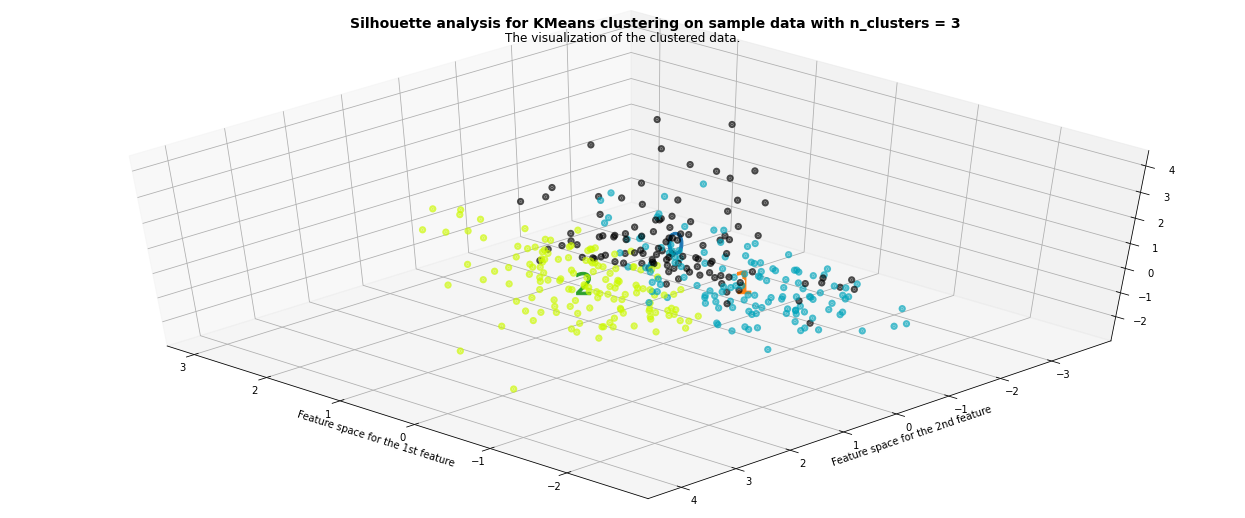

For n_clusters = 4 The average silhouette_score is : 0.26628785893334805


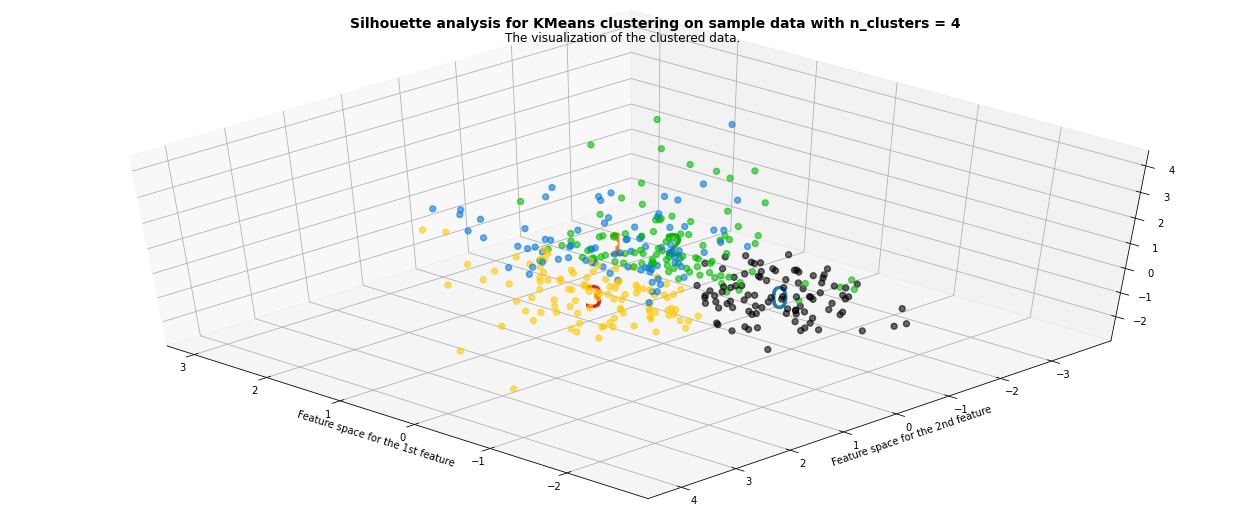

For n_clusters = 5 The average silhouette_score is : 0.269465255011398


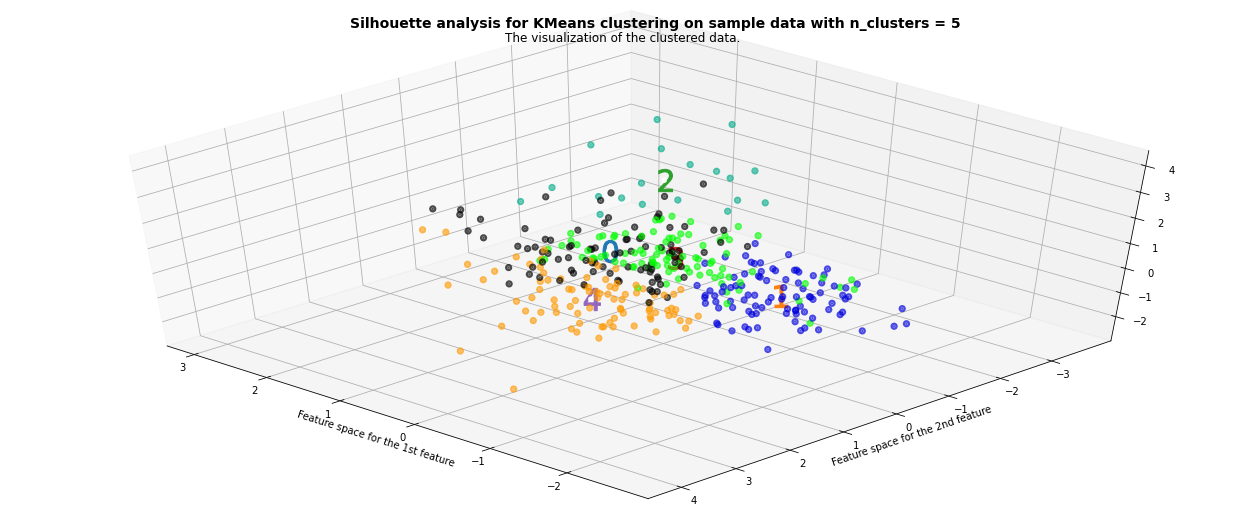

For n_clusters = 6 The average silhouette_score is : 0.2621179655211026


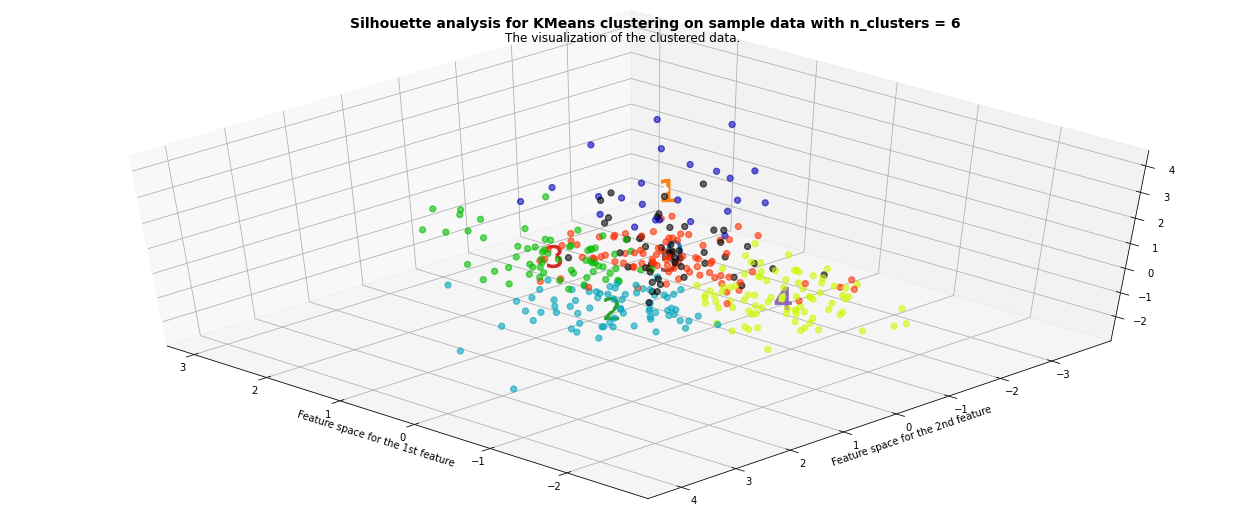

For n_clusters = 7 The average silhouette_score is : 0.2639150077106143


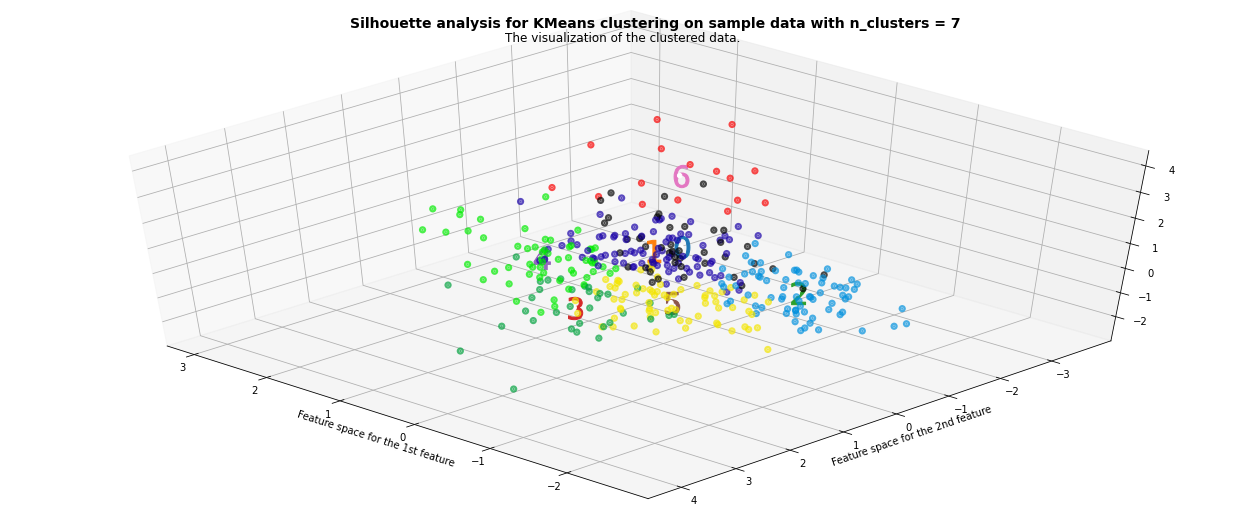

For n_clusters = 8 The average silhouette_score is : 0.25371684958189394


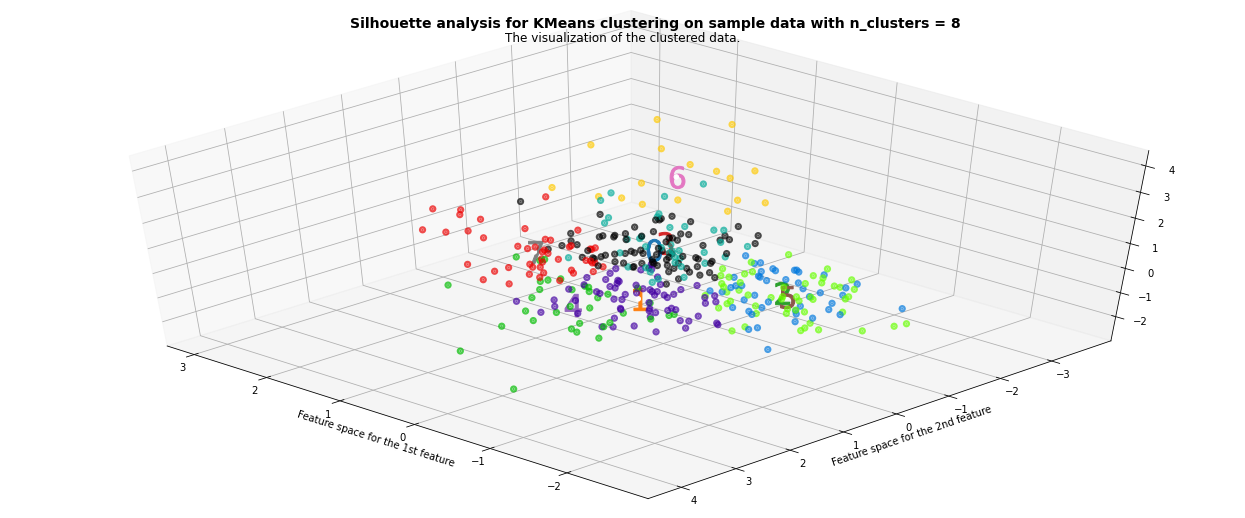

For n_clusters = 10 The average silhouette_score is : 0.24866351831804528


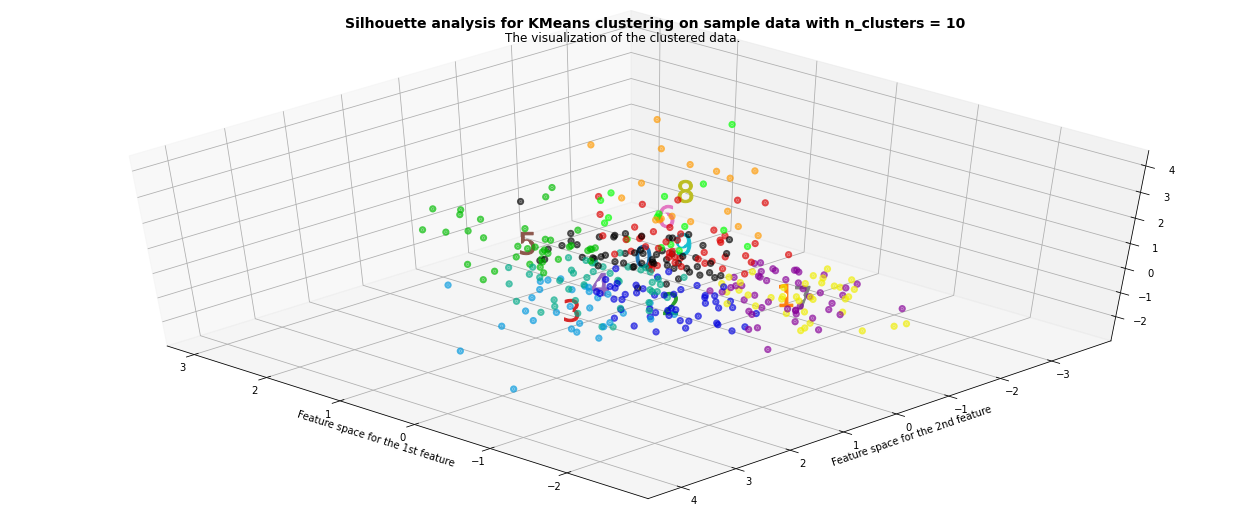

For n_clusters = 11 The average silhouette_score is : 0.2319111549372524


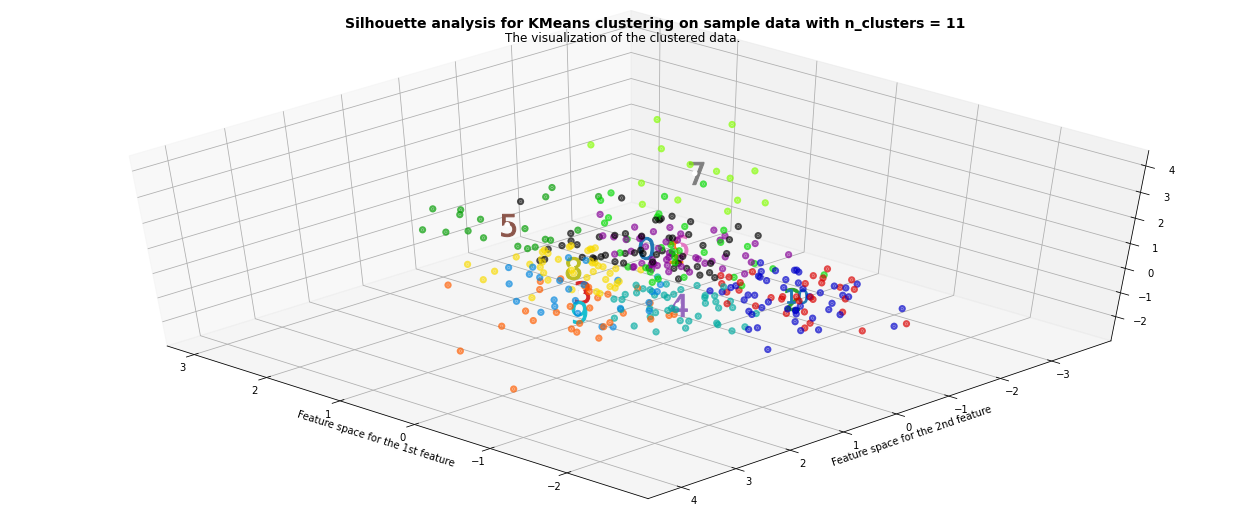

For n_clusters = 13 The average silhouette_score is : 0.23690555854891202


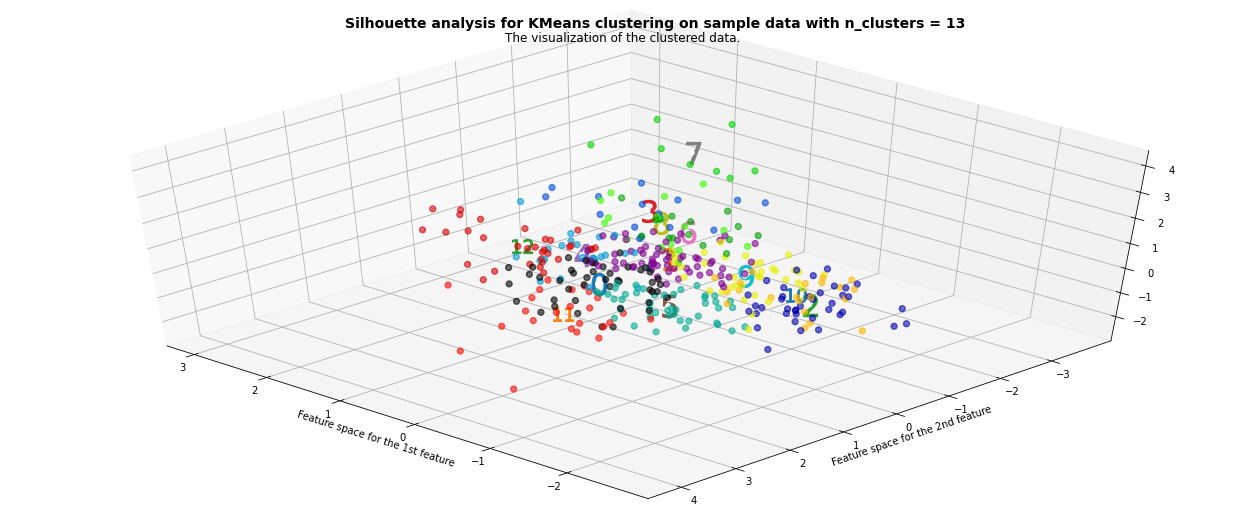

For n_clusters = 30 The average silhouette_score is : 0.2582829333492299


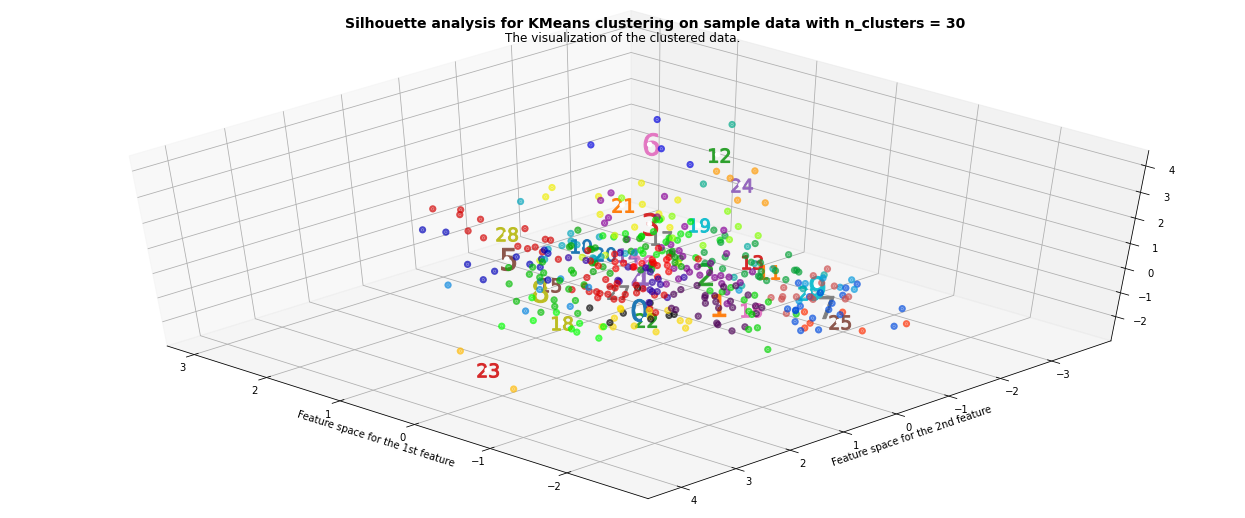

In [5]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D



print(__doc__)

df_train = pd.read_csv(filename_train, parse_dates=True, header = None, encoding='ISO-8859-1')
df_train = df_train[~df_train.isin(['?'])]
df_train = df_train.dropna()
X, Names = prep_dataframe(df_train)
X = preprocessing.MinMaxScaler().fit_transform(X)

range_n_clusters = [3,4,5,6,7,8,10,11,13,30]  # Define how many clusters to create.

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)

    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    pca = PCA(n_components=3, whiten=True).fit(X)
    X_pca = pca.transform(X)
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X_pca)
    cluster_labels = clusterer.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    ax2 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    #print (X[:,3])
    #print (X_pca)    
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], marker='.',  lw=5, alpha=0.7, c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],centers[:, 2],
                marker='o', c="white", alpha=1)
    '''
    for i, txt in enumerate(Names):
        #print (i, txt, X_pca[i][0], X_pca[i][1], X_pca[i][2])
         ax2.text(X_pca[i,0],X_pca[i,1],X_pca[i,2],  '%s' % (txt), size=12, zorder=1, color='k') 
    '''

    #ax2.scatter(centers[:, 0], centers[:, 1],centers[:, 2],
    #           marker='o', c="white", alpha=1, s=200)


    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], c[2], marker='$%d$' % i, alpha=1, s=500)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    #ax2.set_zlabel("Feature space for the 3rd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()